In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# import sympy
import scipy.stats as st
import scipy.special
import pandas
import csv
import math
import multiprocessing as mp
import datetime
from decimal import *
from mpl_toolkits.mplot3d import Axes3D
# from google.colab import drive

## **Google Drive**

In [2]:
# connect to google drive to save the csv file
# drive.mount('drive')
# os.chdir("drive/My Drive/Yen-Ting Lin/Code")

## **Initial Parameters**

### **4SRA Parameters**

In [248]:
# define class to inital RA parameter
class init_RAparameter():
  # initail parameter for statistics value
  def __init__(self, config, sample, preamble_detection, payload_decoding,
                 m_4SRA, subcarrier_4sra, T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra,
                 N_UL_4sra, W_BO_4sra, retrans_4sra, T_MSG_4sra, W_BO_FB, retrans_FB, I_max_4sra, I_max_2sra, I_max_FB):
    self.config = config
    self.sample = sample # number of simulation time
    self.preamble_detection = preamble_detection
    self.payload_decoding = payload_decoding
    self.nUE = 0 # num_UE[0] # number of UE at the beginning
    self.M_RA = 0 # total UEs in RA
    self.subcarrier = subcarrier_4sra # number of preamble
    self.T_RAREP = T_RAREP_4sra
    self.T_RAR = T_RAR_4sra
    self.W_RAR = W_RAR_4sra
    self.N_UL = N_UL_4sra
    self.W_BO = W_BO_4sra
    self.W_BO_FB = W_BO_FB
    self.retrans = retrans_4sra
    self.retrans_FB = retrans_FB
    self.T_MSG = T_MSG_4sra
    self.ratio = m_4SRA
    # self.success_time = 0 # average access time
    self.MS = 0
    self.MS_FB = 0
    self.P_s = 0 # successful probability
    self.P_s_FB = 0 # successful probability
    self.U_r_PRACH = 0 # utilization
    self.U_r_PRACH_FB = 0 # utilization
    self.U_r_PUSCH = 0 # utilization
    self.U_r_PUSCH_FB = 0 # utilization
    self.Da = 0 # access delay
    self.Da_MiSn = 0
    self.Da_FB = 0
    self.Da_MiSn_FB = 0
    self.Da_MiSn_2SFB = 0
    '''
    self.iteMiSn = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.iteMiFn = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.totalMis = [[0]*(maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1) for _ in range(0, self.sample)]
    self.iteMiSn_FB = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.iteMiFn_FB = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.totalMis_FB = [[0]*(maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1) for _ in range(0, self.sample)]
    '''
    self.iteMiSn = [[0]*(self.retrans + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.iteMiFn = [[0]*(self.retrans + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.totalMis = [[0]*(test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1) for _ in range(0, self.sample)]
    self.iteMiSn_FB = [[0]*(self.retrans_FB + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.iteMiFn_FB = [[0]*(self.retrans_FB + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.totalMis_FB = [[0]*(test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1) for _ in range(0, self.sample)]
  # initail parameter for each iteration
  def define_RAparameter(self):
    self.dict_retr = 0
    # print(self.config, self.dict_retr)
    # initial dict_prea = {0:0, 1:0, ..., nUE:0}, UE index : preamble
    self.dict_prea = gen_UE_prea(self.nUE)
    # print(self.config, self.dict_prea, self.nUE)
    # initial slot_lit = [[], [], [], ..., []], ue number in each slot
    self.slot_list = [[] for j in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    # self.slot_list = [[] for j in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1)]
    # initial dict_backoffcnt = {0:0, 1:0, ..., nUE:0}, UE index : backoff counter
    self.dict_backoffcnt = gen_UE_backoffcnt(self.nUE)
    # initial UE_list[UE_id][x]
    # x=0 arrive time, x=1 1st attempt time, x=2 2nd attemp time
    # x=3 3nd attemp time, x=4 4nd attempt time
    # x=5 RA status (0 = over max_transmit, 1 = successful, 2 = failed)
    # [slot = -1 (arrive time), slot = 1st attempt, slot = 2nd attempt, slot = 3nd attempt, slot = 4nd attempt, RA status)]
    self.UE_list = [[-1]*(self.retrans + 3) for _ in range(0, self.nUE)]
    # initail arrive_num from slot0 to Imax
    self.arrive_num = [0 for j in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    # self.arrive_num = [0 for j in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    # to record the fallback UE index
    self.FB_UE_ID = []
    # to record which UE exceed max retransmission
    self.list_left = []
    # total number of fallback-UEs from 2SRA
    self.M_FB = 0
    self.avg_M_FB = 0
    # to record how many time of the process has passed
    self.slot_time = 0
    # to eliminate the gap of slot between 2SRA and 4SRA
    self.slot_offset = []
    # to indicate RA to stop the current process if = 1
    self.slot_stop = []
    # inital statistic value for each iteration
    '''
    self.MiSn = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.MiFn = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.MiSn_FB = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.MiFn_FB = [[0]*(self.retrans + 1) for _ in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    self.T = [0 for j in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans))]
    '''
    self.MiSn = [[0]*(self.retrans + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.MiFn = [[0]*(self.retrans + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.MiSn_FB = [[0]*(self.retrans_FB + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.MiFn_FB = [[0]*(self.retrans_FB + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.T = [0 for j in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    self.T_FB = [0 for j in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB))]
    # inital statistic value for MiSn
    '''
    self.MiSn_list = [0.0 for i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1)]
    self.MiSn_FB_list = [0.0 for i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1)]
    '''
    self.MiSn_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    self.MiSn_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    # inital statistic value for Mi
    self.Mi_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    self.j_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    self.avg_Mi_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    self.j_start = 0.0
  def arrival_process(self, slot, dict_retr, dict_prea, dict_backoffcnt, UE_list, list_left, slot_time, T_RAREP, slot_offset, slot_stop):
    # one-shot
    # print(slot)
    if slot == 0 :
      # initial dict_retr = {0:0, 1:0, ..., nUE:0}, UE index : retransmission counter
      self.dict_retr = gen_UE_id(self.nUE)
      # print(self.config, self.dict_retr)
      self.arrive_num[slot] = len(self.dict_retr)
      for i in range (0, self.nUE):
        self.dict_backoffcnt[i] = 1
    # here can process other arrival process, ex: Possion
    # here we add new arrival from 2SRA that UEs need to fallback to 4SRA
    else:
      # uniform distribution
      # this should be located before the fallback UE assignment
      # print(self.config, dict_retr)
      # print(self.config, self.M_RA, T_sat, t_c, T_s, math.ceil(traffic_arrival(self.M_RA, T_sat, t_c, T_s)[1]))
      # for i in range(0, int(math.ceil(traffic_arrival(self.M_RA, T_sat, t_c, T_s, T_RAREP_4sra)[1]))): # T_RAREP_4sra = T_RAREP_2sra
      for i in range(0, 10):
        # add new key to dict_retr of RA
        # used to be (list_left[i] + self.nUE) but it will cause index_error for UE_list
        # with len(UE_list), dict_retr will become {0:0, 1:0, ..., nUE:0, (nUE + 1):0}
        self.dict_retr[len(self.UE_list)] = 0 # uniform distribution
        self.dict_prea[len(self.UE_list)] = 0 # uniform distribution
        # so that UEs could transmit in the next slot directly after fallback
        self.dict_backoffcnt[len(self.UE_list)] = 0 # uniform distribution
        self.UE_list.append([-1]*(self.retrans + 3)) # uniform distribution
      # which means the next 2SRA slot will still in the current 4SRA slot
      # print(slot_time, self.slot_time, ((slot_time - self.slot_time) / self.T_RAREP))
      # print("arrivel", self.slot_time, slot_time)
      if (T_RAREP > self.T_RAREP) and ((slot_time - self.slot_time) / self.T_RAREP) >= 1.0:
        # print("4SRA slot gap occurs")
        # 2SRA and 4SRA have one 2SRA slot gap
        slot_offset.append(1)
        # print("4SRA slot offset", slot_offset)
        # to stop 4SRA process
        slot_stop.append(1)
      # if the current 2SRA slot is larger than current 4SRA slot
      # which means fallback UEs in the current 2SRA slot will need to fallback to next 4SRA slot
      elif (T_RAREP < self.T_RAREP) and self.slot_time > slot_time:
        # print("2SRA slot gap occurs")
        # 2SRA and 4SRA have one 4SRA slot gap
        self.slot_offset.append(1)
        # print("2SRA slot offset", slot_offset)
        # to stop 2SRA process
        self.slot_stop.append(1)
      # fallback UEs could just fallback to 2SRA, no need to wait
      else:
        # if there have some UEs left 2SRA
        if len(list_left) > 0:
          for i in range(0, len(list_left)):
            # add new key to dict_retr of 4SRA
            # used to be (list_left[i] + self.nUE) but it will cause index_error for UE_list
            # with len(UE_list), dict_retr will become {0:0, 1:0, ..., nUE:0, (nUE + 1):0}
            dict_retr[len(UE_list)] = 0 # fallback UEs
            dict_prea[len(UE_list)] = 0 # fallback UEs
            # so that UEs could transmit in the next slot directly after fallback
            dict_backoffcnt[len(UE_list)] = 0 # fallback UEs
            UE_list.append([-1]*(self.retrans_FB + 3)) # fallback UEs
            self.FB_UE_ID.append(len(UE_list))
          self.j_list[slot] = slot
        # record how many UEs fallback from 2SRA
        # print("number of fallback UEs", len(list_left))
        self.M_FB += len(list_left)
        self.Mi_FB_list[slot] += len(list_left)
        # print("slot", slot, "Mi_FB_list", self.Mi_FB_list[slot])
        # remove all UEs from 2SRA list_left
        del list_left[:]
        # self.arrive_num[slot] = len(self.dict_retr)
        # case for T_RAREP_4sra > T_RAREP_2sra : to start 4SRA process
        del slot_stop[:]
        # case for T_RAREP_2sra > T_RAREP_4sra : to start 2SRA process
        del self.slot_stop[:]
      # print("slot_offset", slot_offset, "slot_stop", slot_stop)
      self.arrive_num[slot] = len(self.dict_retr)
    # print("i = ", slot, "; j = ", self.j_list[slot])
    # print(self.config, self.arrive_num[slot])
    # print("-----------------------------------")
  def departure_process(self, slot, countdown):
    for ue in list(self.dict_retr):
      self.dict_backoffcnt[ue] -= countdown
      # when backoff conunter equal to 0 means it's time to contend the RACH resource
      if self.dict_backoffcnt[ue] <= 0:
        # genearate preamble for each of ue, EX: dict_prea = {0:23, 1:34, ..., nUE:16}
        self.dict_prea[ue] = self.doRA()
        # append ue in slot_list to know which ue in current slot, EX: slot_list = [[0,1,2,...,nUE], [...], ..., [...]]
        self.slot_list[slot].append(ue)
        # record infomation in UE_list
        # print(ue, self.dict_retr[ue] + 1)
        self.UE_list[ue][self.dict_retr[ue] + 1] = slot
    # check the preamble to get the success ue and remove the success ue from dict_retr
    self.check_preamble(slot, self.subcarrier)
    # add retranmsission counter for failure ue in dict_retr
    self.doretrans(slot)
    # give the random backoff counter for the ue in dict_retr
    self.backoff(slot)
  # give preamble for each UE
  def doRA(self):
    if self.subcarrier != 0:
      return random.randint(1, self.subcarrier)
    else:
      return -1
  # this function is added for implementing the factor of preamble detection probability
  def pre_check_preamble(self, slot, subcarrier):
    # to calculate number of UEs for each preamble, EX: num_successful_ue = [3, 2, 0, 6...]
    num_selected_ue = [0 for i in range(0, int(subcarrier) + 1)]
    # to calculate total successful preamble
    num_successful_ue = 0
    # to record which successful preamble fails to be detected
    failed_successful_preamble = []
    # check preamble from preamble 1 to subcarrier
    for preamble in range(1, int(subcarrier) + 1):
      # ue_list = slot_list[slot], ue_list is the UE in current slot
      for i in self.slot_list[slot]:
        # check each of UE's preamble (dict_prea) is equal to current preamble or not and record which ue is same as current preamble
        if self.dict_prea[i] == preamble:
          num_selected_ue[preamble] += 1
      # to find how many successful UEs
      if num_selected_ue[preamble] == 1:
        num_successful_ue += 1
    # print("num_selected_ue", num_selected_ue)
    # print("num_successful_ue", num_successful_ue)
    # find and count all "1" in num_successful_ue, check if it's bigger than N_UL
    while num_successful_ue > self.N_UL:
      # generate a random integernumber, this number means for this successful preamble,
      # UE will become failed UE because gNB cannot detect this preamble
      failed_preamble = random.randint(1, int(subcarrier))
      # if this preamble does have only one UE selecting
      # second condition is to avoid generate the same random number
      if (num_selected_ue[failed_preamble] == 1) and (failed_preamble not in failed_successful_preamble):
        # this successful preamble fails to be detected
        failed_successful_preamble.append(failed_preamble)
        # total successful preamble countdown 1
        num_successful_ue -= 1
    # print("failed_successful_preamble", failed_successful_preamble)
    # print("--------------------------")
    return failed_successful_preamble
  def check_preamble(self, slot, subcarrier):
    # get the list of failed successful UE
    undetected_ue = self.pre_check_preamble(slot, subcarrier)
    # check preamble from preamble 1 to subcarrier
    for preamble in range(1, int(subcarrier) + 1):
      # print("Preamble", preamble)
      # get which ue choose current preamble, EX: collided_ue = [1, 5, 23...]
      collided_ue = self.preak(slot, preamble)
      # make sure the collided_ue is larger than 0 that means at least one ue choose this premable and mark this ue is success
      if len(collided_ue) != 0:
        self.find_succuss_RA(slot, collided_ue, preamble, undetected_ue)
  # check the preamble choosen by whihc UE
  def preak(self, slot, preamble):
    collided_ue = []
    # ue_list = slot_list[slot], ue_list is the UE in current slot
    for i in self.slot_list[slot]:
      # check each of UE's preamble (dict_prea) is equal to current preamble or not and record which ue is same as current preamble
      if self.dict_prea[i] == preamble:
        # put UE number that has selected that preamble
        collided_ue.append(i)
    return collided_ue
  # get non collision UE and remove from dict_retr
  def find_succuss_RA(self, slot, collided_ue, preamble, undetected_ue):
    # non collision
    if len(collided_ue) == 1:
      # print("Successful UE ID", collided_ue)
      # success UE
      success_ue = collided_ue[0]
      # print(self.config, self.dict_prea)
      # print(self.config, slot, success_ue)
      # get the retransmsission counter
      retry = self.dict_retr[success_ue]
      # print(slot, retry)
      if self.preamble_detection == "false":
        # if success_ue < self.nUE: # because of uniform distribution, this condition is not applicable
        if success_ue not in self.FB_UE_ID: # use a FB UE ID list to be the condition
          # the RA complete time not exceeds the coverage time
          if (self.config == "4SRA" and slot + T_RA_CMPLT_4sra <= T_cell) or (self.config == "2SRA" and slot + T_RA_CMPLT_2sra <= T_cell):
            # add one success in MiSn (4SRA)
            self.MiSn[slot][retry] += 1
            # mark UE status as '1'
            self.UE_list[success_ue][self.retrans + 2] = 1
          else:
            # add one fialure in MiFn (4SRA)
            self.MiFn[slot][retry] += 1
            # mark UE status as '0'
            self.UE_list[success_ue][self.retrans + 2] = 0
          '''
          # add one success in MiSn (4SRA)
          self.MiSn[slot][retry] += 1
          # mark UE status as '1'
          self.UE_list[success_ue][self.retrans + 2] = 1
          '''
        else:
          # the RA complete time not exceeds the coverage time
          if self.config == "4SRA" and slot + T_RA_CMPLT_4sra <= T_cell:
            # add one success in MiSn_FB (2SRA fallback)
            self.MiSn_FB[slot][retry] += 1
            # mark UE status as '1'
            self.UE_list[success_ue][self.retrans_FB + 2] = 1
          else:
            # add one fialure in MiFn_FB (2SRA fallback)
            self.MiFn_FB[slot][retry] += 1
            # mark UE status as '0'
            self.UE_list[success_ue][self.retrans_FB + 2] = 0
          '''
          # add one success in MiSn_FB (2SRA fallback)
          self.MiSn_FB[slot][retry] += 1
          # mark UE status as '1'
          self.UE_list[success_ue][self.retrans_FB + 2] = 1
          '''
        # remove success ue from dict_retr
        del self.dict_retr[success_ue]
      elif self.preamble_detection == "true":
        # if the preamble in the list of those failed successful UEs
        if preamble in undetected_ue:
          # this preamble is failed because it's in the undetected_ue list
          # print("preamble", preamble, ", preamble in undetected_ue")
          # if success_ue < self.nUE: # because of uniform distribution, this condition is not applicable
          if success_ue not in self.FB_UE_ID: # use a FB UE ID list to be the condition
            # add one fialure in MiFn (4SRA)
            self.MiFn[slot][retry] += 1
            # mark UE status as '0'
            self.UE_list[success_ue][self.retrans + 2] = 0
          else:
            # add one fialure in MiFn_FB (2SRA fallback)
            self.MiFn_FB[slot][retry] += 1
            # mark UE status as '0'
            self.UE_list[success_ue][self.retrans_FB + 2] = 0
          success_ue = -1
        else:
          # this preamble is successful because it's not in the undetected_ue list
          # print("preamble", preamble, ", preamble not in undetected_ue")
          # get the retransmsission counter
          retry = self.dict_retr[success_ue]
          # print(slot, retry)
          # if success_ue < self.nUE: # because of uniform distribution, this condition is not applicable
          if success_ue not in self.FB_UE_ID: # use a FB UE ID list to be the condition
            # the RA complete time not exceeds the coverage time=
            if (self.config == "4SRA" and slot + T_RA_CMPLT_4sra <= T_cell) or (self.config == "2SRA" and slot + T_RA_CMPLT_2sra <= T_cell):
              # add one success in MiSn (4SRA)
              self.MiSn[slot][retry] += 1
              # mark UE status as '1'
              self.UE_list[success_ue][self.retrans + 2] = 1
            else:
              # add one fialure in MiFn (4SRA)
              self.MiFn[slot][retry] += 1
              # mark UE status as '0'
              self.UE_list[success_ue][self.retrans + 2] = 0
            '''
            # add one success in MiSn (4SRA)
            self.MiSn[slot][retry] += 1
            # mark UE status as '1'
            self.UE_list[success_ue][self.retrans + 2] = 1
            '''
          else:
            # the RA complete time not exceeds the coverage time
            if self.config == "4SRA" and slot + T_RA_CMPLT_4sra <= T_cell:
              # add one success in MiSn_FB (2SRA fallback)
              self.MiSn_FB[slot][retry] += 1
              # mark UE status as '1'
              self.UE_list[success_ue][self.retrans_FB + 2] = 1
            else:
              # add one fialure in MiFn_FB (2SRA fallback)
              self.MiFn_FB[slot][retry] += 1
              # mark UE status as '0'
              self.UE_list[success_ue][self.retrans_FB + 2] = 0
            '''
            # add one success in MiSn_FB (2SRA fallback)
            self.MiSn_FB[slot][retry] += 1
            # mark UE status as '1'
            self.UE_list[success_ue][self.retrans_FB + 2] = 1
            '''
          # remove success ue from dict_retr
          del self.dict_retr[success_ue]
        # print("=========================================")
    # more than one UE choose current preamble
    else:
      # print("Collided UE ID", collided_ue)
      # loop all the collision UE
      for failed_ue in collided_ue:
        # get the retransmsission counter
        retry = self.dict_retr[failed_ue]
        # print(slot, retry)
        # if failed_ue < self.nUE: # because of uniform distribution, this condition is not applicable
        if failed_ue not in self.FB_UE_ID: # use a FB UE ID list to be the condition
          # add one fialure in MiFn (4SRA)
          self.MiFn[slot][retry] += 1
          # mark UE status as '0'
          self.UE_list[failed_ue][self.retrans + 2] = 0
        else:
          # add one fialure in MiFn_FB (2SRA fallback)
          self.MiFn_FB[slot][retry] += 1
          # mark UE status as '0'
          self.UE_list[failed_ue][self.retrans_FB + 2] = 0
      success_ue = -1
  # add retranmsission counter for UE in dict_retr and current slot
  # delete UE from dict_retr if UE reach to maximum retransmission number
  def doretrans(self, slot):
    # retr_ue = slot_list[slot], retr_ue is UE in current slot
    for i in self.slot_list[slot]:
      if i in self.dict_retr:
        # add retransmission counter for failure UE
        self.dict_retr[i] += 1
        # if i < self.nUE: # because of uniform distribution, this condition is not applicable
        if i not in self.FB_UE_ID: # use a FB UE ID list to be the condition
          # for the UE in 4SRA
          # mark UE status as '2'
          self.UE_list[i][self.retrans + 2] = 2
          # check retransmission counter is larger than the max retranmsission times or not
          if self.dict_retr[i] > self.retrans:
            # mark UE status as '0'
            self.UE_list[i][self.retrans + 2] = 0
            # record the UE id into list_left
            self.list_left.append(list(self.dict_retr.keys())[list(self.dict_retr.values()).index(self.retrans + 1)])
            # exceed max retransmission times and remove this UE from dict_retr
            del self.dict_retr[i]
        else:
          # for the UE in Fallback
          # mark UE status as '2'
          self.UE_list[i][self.retrans_FB + 2] = 2
          # check retransmission counter is larger than the max retranmsission times or not
          if self.dict_retr[i] > self.retrans_FB:
            # mark UE status as '0'
            self.UE_list[i][self.retrans_FB + 2] = 0
            # record the UE id into list_left
            self.list_left.append(list(self.dict_retr.keys())[list(self.dict_retr.values()).index(self.retrans_FB + 1)])
            # exceed max retransmission times and remove this UE from dict_retr
            del self.dict_retr[i]
  # give the random backoff counter for the ue in dict_retr and current slot
  def backoff(self, slot):
    for i in self.slot_list[slot]:
      if i in self.dict_retr:
        # if i < self.nUE: # because of uniform distribution, this condition is not applicable
        if i not in self.FB_UE_ID: # use a FB UE ID list to be the condition
          # for the UE in 4SRA
          retrans_slot = int(slot + np.ceil((self.T_RAR + self.W_RAR + random.uniform(0, self.W_BO)) / self.T_RAREP))
          self.dict_backoffcnt[i] = retrans_slot - slot
        else:
          # for the UE in Fallback
          retrans_slot = int(slot + np.ceil((self.T_RAR + self.W_RAR + random.uniform(0, self.W_BO_FB)) / self.T_RAREP))
          self.dict_backoffcnt[i] = retrans_slot - slot
  def calculate_statistic(self):
    # accumulate MiSn, MiFn from each iteration of sample
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      for temp_n in range (0, self.retrans + 1):
        self.iteMiSn[temp_i][temp_n] += self.MiSn[temp_i][temp_n]
        self.iteMiFn[temp_i][temp_n] += self.MiFn[temp_i][temp_n]
      for temp_n in range (0, self.retrans_FB + 1):
        self.iteMiSn_FB[temp_i][temp_n] += self.MiSn_FB[temp_i][temp_n]
        self.iteMiFn_FB[temp_i][temp_n] += self.MiFn_FB[temp_i][temp_n]
    '''
    # access delay for 4SRA
    for temp_i in range(0,  test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      if self.payload_decoding == "true":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_4sra + self.T_MSG
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + self.T_MSG
      elif self.payload_decoding == "false":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_4sra
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_MSG
    '''
    # access delay for Fallback
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      if self.payload_decoding == "true":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_FB + self.T_MSG
        if temp_i < self.j_start:
          self.T_FB[temp_i] = 0
        else:
          self.T_FB[temp_i] = (temp_i - self.j_start - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + self.T_MSG
      elif self.payload_decoding == "false":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_FB
        if temp_i < self.j_start:
          self.T_FB[temp_i] = 0
        else:
          # self.T_FB[temp_i] = (temp_i - self.j_start - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15
          self.T_FB[temp_i] = (temp_i - self.j_start - 1) * self.T_RAREP + self.T_MSG
        # print(self.config, self.j_list[temp_i], temp_i - self.j_list[temp_i] + 1)
        # print(self.T_FB[temp_i])
      # for temp_n in range (0, self.retrans_FB + 1):
      #   self.Da_MiSn_FB += self.iteMiSn_FB[temp_i][temp_n] * float(self.T_FB[temp_i])
  def get_MS(self):
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      # average total data size / accumulate data size in each slot
      for temp_n in range (0, self.retrans + 1):
        # MiSn
        self.MiSn_list[temp_i] += self.iteMiSn[temp_i][temp_n] / float(self.sample)
        # Ms
        self.iteMiSn[temp_i][temp_n] = self.iteMiSn[temp_i][temp_n] / float(self.sample)
        self.iteMiFn[temp_i][temp_n] = self.iteMiFn[temp_i][temp_n] / float(self.sample)
        self.MS += self.iteMiSn[temp_i][temp_n]
      for temp_n in range (0, self.retrans_FB + 1):
        # MiSn
        self.MiSn_FB_list[temp_i] += self.iteMiSn_FB[temp_i][temp_n] / float(self.sample)
        # Ms
        self.iteMiSn_FB[temp_i][temp_n] = self.iteMiSn_FB[temp_i][temp_n] / float(self.sample)
        self.iteMiFn_FB[temp_i][temp_n] = self.iteMiFn_FB[temp_i][temp_n] / float(self.sample)
        self.MS_FB += self.iteMiSn_FB[temp_i][temp_n]
      # MiSn
      self.MiSn_list[temp_i] = round((self.MiSn_list[temp_i]) * 1000000) / 1000000
      self.MiSn_FB_list[temp_i] = round((self.MiSn_FB_list[temp_i]) * 1000000) / 1000000
      # Mi
      self.Mi_FB_list[temp_i] = round((self.Mi_FB_list[temp_i]) * 1000000) / 1000000
    # print(self.config, self.Mi_FB_list)
    # Ms
    self.MS = round((self.MS) * 1000000) / 1000000
    self.MS_FB = round((self.MS_FB) * 1000000) / 1000000
    
    '''
    # access delay for 4SRA UE
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      for temp_n in range (0, self.retrans + 1):
        self.Da_MiSn += self.iteMiSn[temp_i][temp_n] * float(self.T[temp_i])
    '''
    
    # access delay for FB UE
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      for temp_n in range (0, self.retrans_FB + 1):
        self.Da_MiSn_FB += self.iteMiSn_FB[temp_i][temp_n] * float(self.T_FB[temp_i])
    
  def report(self):
    self.get_MS()
    # Sucesss Probability
    # for 4SRA
    # if self.nUE != 0:
    if self.M_RA != 0:
      # self.P_s = round((float(self.MS) / float(self.nUE)) * 1000000) / 1000000
      self.P_s = round((float(self.MS) / float(self.M_RA + 1000)) * 1000000) / 1000000
    else:
      self.P_s = 0.0
    # for Fallback
    if self.avg_M_FB != 0:
      self.P_s_FB = round((float(self.MS_FB) / float(self.avg_M_FB)) * 1000000) / 1000000
    else:
      self.P_s_FB = 0.0

    # Access Delay
  
    # for 4SRA
    for temp_i in range(0,  test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      if self.payload_decoding == "true":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_4sra + self.T_MSG
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + self.T_MSG
      elif self.payload_decoding == "false":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_4sra
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_MSG
      for temp_n in range (0, self.retrans + 1):
        self.Da_MiSn += self.iteMiSn[temp_i][temp_n] * float(self.T[temp_i])
  
    #     print(self.iteMiSn[temp_i][temp_n] * float(self.T[temp_i]))
    #   print("------------------------------------")
    # print("####################################")
    # if self.nUE != 0 and self.MS != 0:
    if self.M_RA != 0 and self.MS != 0:
      self.Da = float(self.Da_MiSn) / float(self.MS)
    else:
      self.Da = 0.0
    '''
    # for Fallback
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      if self.payload_decoding == "true":
        # self.T[temp_i] = (temp_i + 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_FB + self.T_MSG
        if temp_i < self.j_start:
          self.T_FB[temp_i] = 0
        else:
          self.T_FB[temp_i] = (temp_i - self.j_start + 1) * self.T_RAREP + self.T_RAR + self.W_RAR + self.T_MSG
      elif self.payload_decoding == "false":
        # self.T[temp_i] = (temp_i + 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 15 + T_total_FB
        if temp_i < self.j_start:
          self.T_FB[temp_i] = 0
        else:
          self.T_FB[temp_i] = (temp_i - self.j_start + 1) * self.T_RAREP + self.T_RAR + self.W_RAR
        # print(self.config, self.j_list[temp_i], temp_i - self.j_list[temp_i] + 1)
        # print(self.T_FB[temp_i])
      for temp_n in range (0, self.retrans_FB + 1):
        self.Da_MiSn_FB += self.iteMiSn_FB[temp_i][temp_n] * float(self.T_FB[temp_i])
    '''
    if self.avg_M_FB != 0 and self.MS_FB != 0:
      self.Da_FB = float(self.Da_MiSn_FB) / float(self.MS_FB)
    else:
      self.Da_FB = 0.0
    # print(float(self.Da_MiSn_FB), float(self.MS_FB))

    # Resource Utilization
    # for 4SRA
    if self.subcarrier != 0:
      self.U_r_PRACH = round((float(self.MS) / float(test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * self.subcarrier)) * 1000000) / 1000000
      self.U_r_PUSCH = float(self.MS)
    else:
      self.U_r_PRACH = 0.0
      self.U_r_PUSCH = 0.0

    # for Fallback
    if self.subcarrier != 0:
      self.U_r_PRACH_FB = round((float(self.MS_FB) / float(test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * self.subcarrier)) * 1000000) / 1000000
      self.U_r_PUSCH_FB = float(self.MS_FB)
    else:
      self.U_r_PRACH_FB = 0.0
      self.U_r_PUSCH_FB = 0.0

### **2SRA Parameters**

In [259]:
# define class to inital 2SRA parameter
class init_2SRAparameter(init_RAparameter):
  # initail parameter for statistics value
  def __init__(self, config, sample, preamble_detection, payload_decoding,
               m_4SRA, m_2SRA,
               subcarrier_4sra, subcarrier_2sra,
               T_RAREP_4sra, T_RAREP_2sra,
               T_RAR_4sra, T_RAR_2sra,
               W_RAR_4sra, W_RAR_2sra,
               N_UL_4sra, N_UL_2sra,
               W_BO_4sra, W_BO_2sra,
               retrans_4sra, retrans_2sra,
               T_MSG_4sra, T_MSG_2sra,
               W_BO_FB, retrans_FB,
               I_max_4sra, I_max_2sra, I_max_FB):
    # inherit the parameter initialisation from RA
    # so that we can use the same initial parameters
    super().__init__(config, sample, preamble_detection, payload_decoding,
                 m_2SRA, subcarrier_2sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra,
                 N_UL_2sra, W_BO_2sra, retrans_2sra, T_MSG_2sra, W_BO_FB, retrans_FB, I_max_4sra, I_max_2sra, I_max_FB)
    self.four_SRA = init_RAparameter("4SRA", sample, preamble_detection, payload_decoding,
                          m_4SRA, subcarrier_4sra, T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra,
                          N_UL_4sra, W_BO_4sra, retrans_4sra, T_MSG_4sra, W_BO_FB, retrans_FB, I_max_4sra, I_max_2sra, I_max_FB)
    self.P_s_T = 0 # total successful probability
    self.Ms_T = 0 # total number of successful UE
    # self.Uti_T = 0 # total number of resource been used
    self.Da_T = 0 # total access delay
    self.MiSn_T_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    # self.MiSn_T_list = [0.0 for i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans) + 1)]
  '''
  def grouping(self):
    self.numUE_to_2SRA = 0
    self.numUE_to_4SRA = 0
    self.dict_N = gen_UE_group(num_UE[0], (self.subcarrier + self.four_SRA.subcarrier))
    self.numUE_to_2SRA, self.numUE_to_4SRA = compare_N_and_N_2SRA(self.dict_N, num_UE[0], self.subcarrier)
  '''
  # initail parameter for each iteration
  def define_RAparameter(self):
    # initail parameter for different procedure
    # self.grouping()
    self.M_RA = int(num_UE[0] * (self.ratio / (self.four_SRA.ratio + self.ratio)))
    # print("2SRA", int(math.ceil(traffic_arrival(self.M_RA, T_sat, t_c, T_s, T_RAREP_2sra)[0])))
    self.nUE = int(math.ceil(traffic_arrival(self.M_RA, T_sat, t_c, T_s, T_RAREP_2sra)[0])) + 10 # self.numUE_to_2SRA # num_UE_2SRA[0] # num_UE_2SRA[0]
    super().define_RAparameter()
    self.four_SRA.M_RA = int(num_UE[0] * (self.four_SRA.ratio / (self.four_SRA.ratio + self.ratio)))
    # print("4SRA", int(math.ceil(traffic_arrival(self.four_SRA.M_RA, T_sat, t_c, T_s, T_RAREP_4sra)[0])))
    self.four_SRA.nUE = int(math.ceil(traffic_arrival(self.four_SRA.M_RA, T_sat, t_c, T_s, T_RAREP_4sra)[0])) + 10 # self.numUE_to_4SRA # num_UE_2SRA[0] # num_UE - num_UE_2SRA[0]
    self.four_SRA.define_RAparameter()
  def arrival_process(self, slot, dict_retr, dict_prea, dict_backoffcnt, UE_list, list_left, slot_time, T_RAREP, slot_offset, slot_stop):
    super().arrival_process(slot, dict_retr, dict_prea, dict_backoffcnt, UE_list, list_left, slot_time, T_RAREP, slot_offset, slot_stop)
    self.four_SRA.arrival_process(slot, 0, 0, 0, [], [], 0, 0, [], [])
  def departure_process(self, slot, countdown):
    super().departure_process(slot, countdown)
  def calculate_statistic(self):
    super().calculate_statistic()
    self.four_SRA.calculate_statistic()
  def get_MS(self):
    super().get_MS()
  def report(self):
    # calculat the average ue number for 4SRA UE and 2SRA UE
    self.four_SRA.report()
    self.report_2SRA()
    self.calculate_total()
  def report_2SRA(self):
    self.get_MS()
    # MiSn
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      self.MiSn_T_list[temp_i] = round((self.four_SRA.MiSn_list[temp_i] + self.MiSn_list[temp_i] + self.four_SRA.MiSn_FB_list[temp_i]) * 1000000) / 1000000
    # Sucesss Probability
    # if self.nUE != 0:
    if self.M_RA != 0:
      # self.P_s = round((float(self.MS) / float(self.nUE)) * 1000000) / 1000000
      self.P_s = round((float(self.MS) / float(self.M_RA + 1000)) * 1000000) / 1000000
    else:
      self.P_s = 0.0
    # Access Delay
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for temp_i in range(0, maxslot(self.T_RAREP, self.T_RAR, self.W_RAR, self.W_BO, self.retrans)):
      if self.payload_decoding == "true":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 9 + T_total_2sra + self.T_MSG
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + self.T_MSG
      elif self.payload_decoding == "false":
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 9 + T_total_2sra
        # self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_RAR + self.W_RAR + 1
        self.T[temp_i] = (temp_i - 1) * self.T_RAREP + self.T_MSG 
      for temp_n in range (0, self.retrans + 1):
        self.Da_MiSn += self.iteMiSn[temp_i][temp_n] * float(self.T[temp_i])
    # if self.nUE != 0 and self.MS != 0:
    if self.M_RA != 0 and self.MS != 0:
      self.Da = float(self.Da_MiSn) / float(self.MS)
    else:
      self.Da = 0.0
    # Resource Utilization
    if self.subcarrier != 0:
      self.U_r_PRACH = round((float(self.MS) / float(test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * self.subcarrier)) * 1000000) / 1000000
      self.U_r_PUSCH = test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * self.subcarrier
    else:
      self.U_r_PRACH = 0.0
      self.U_r_PUSCH = 0.0
  # calcualte the Ms_T, P_s_T, Da_T, Uti_T
  def calculate_total(self):
    # total successful UE
    self.Ms_T = float(self.MS) + float(self.four_SRA.MS) + float(self.four_SRA.MS_FB)
    
    # total sucesss probability
    # if self.nUE != 0 or self.four_SRA.nUE != 0 or self.four_SRA.MS_FB != 0:
    if self.M_RA != 0 or self.four_SRA.M_RA != 0 or self.four_SRA.MS_FB != 0:
      # self.P_s_T = round(((self.Ms_T) / (float(self.nUE) + float(self.four_SRA.nUE))) * 1000000) / 1000000
      self.P_s_T = round(((self.Ms_T) / (float(self.M_RA + 1000) + float(self.four_SRA.M_RA + 1000))) * 1000000) / 1000000
    else:
      self.P_s_T = 0.0

    # total access delay for 2SRA
    if (self.MS + self.four_SRA.MS_FB) != 0:
      self.Da_2SRA_T = round((self.Da * float(self.MS) + self.four_SRA.Da_FB * float(self.four_SRA.MS_FB)) / (float(self.MS) + float(self.four_SRA.MS_FB)) * 1000000) / 1000000
    else:
      self.Da_2SRA_T = 0.0
    
    # total access delay
    if (self.MS + self.four_SRA.MS + self.four_SRA.MS_FB) != 0:
      self.Da_T = round((self.Da * float(self.MS) + self.four_SRA.Da * float(self.four_SRA.MS) + self.four_SRA.Da_FB * float(self.four_SRA.MS_FB)) / (float(self.Ms_T)) * 1000000) / 1000000
    else:
      self.Da_T = 0.0

    # total utilization for 4SRA
    if self.subcarrier != 0 or self.four_SRA.subcarrier != 0:
      # self.Ur_PUSCH_T = round(((float(self.MS) + float(self.four_SRA.MS)) / (float(maxslot() * (self.subcarrier + self.four_SRA.subcarrier)))) * 1000000) / 1000000
      self.Ur_PUSCH_4SRA_T = float(self.four_SRA.U_r_PUSCH) + float(self.four_SRA.U_r_PUSCH_FB)
    else:
      self.Ur_PUSCH_4SRA_T = 0.0
    
    # total utilization
    if self.subcarrier != 0 or self.four_SRA.subcarrier != 0:
      # self.Ur_PRACH_T = round(((float(self.MS) + float(self.four_SRA.MS)) / (float(maxslot() * (self.subcarrier + self.four_SRA.subcarrier)))) * 1000000) / 1000000
      self.Ur_PUSCH_T = float(self.four_SRA.U_r_PUSCH) + float(self.U_r_PUSCH)+ float(self.four_SRA.U_r_PUSCH_FB)
    else:
      # self.Ur_PRACH_T = 0.0
      self.Ur_PUSCH_T = 0.0

## **Arrival Process**

In [5]:
def arrival_process(self, slot):
  # one-shot
  if slot == 0 :
    # initial dict_retr = {0:0, 1:0, ..., nUE:0}, UE index : retransmission counter
    self.dict_retr = gen_UE_id(self.nUE)
    self.arrive_num[slot] = len(self.dict_retr)
    for i in range (0, self.nUE):
      self.dict_backoffcnt[i] = 1
  # here can process other arrival process, ex: Possion
  else:
    self.arrive_num[slot] = len(self.dict_retr)

## **Departure Process**

In [ ]:
def departure_process(self, slot, countdown):
  for ue in list(self.dict_retr):
    self.dict_backoffcnt[ue] -= countdown
    # when backoff conunter equal to 0 means it's time to contend the RACH resource
    if self.dict_backoffcnt[ue] <= 0:
      # genearate preamble for each of ue, EX: dict_prea = {0:23, 1:34, ..., nUE:16}
      self.dict_prea[ue] = doRA(self.subcarrier)
      # append ue in slot_list to know which ue in current slot, EX: slot_list = [[0,1,2,...,nUE], [...], ..., [...]]
      self.slot_list[slot].append(ue)
      # record infomation in UE_list
      self.UE_list[ue][self.dict_retr[ue] + 1] = slot
  # check the preamble to get the success ue and remove the success ue from dict_retr
  self.check_preamble(slot, self.subcarrier)
  # add retranmsission counter for failure ue in dict_retr
  doretrans(self.dict_retr, self.slot_list[slot], self.UE_list)
  # give the random backoff counter for the ue in dict_retr
  backoff(self.dict_retr, self.dict_backoffcnt, self.slot_list, slot)

### **Preamble Selection**

In [ ]:
# give preamble for each UE
def doRA(subcarrier):
  if subcarrier != 0:
    return random.randint(1, subcarrier)
  else:
    return -1

### **Preamble Checking**

In [ ]:
def check_preamble(self, slot, subcarrier):
  # check preamble from preamble 1 to subcarrier
  for preamble in range(1, int(subcarrier) + 1):
    # get which ue choose current preamble, EX: collided_ue = [1, 5, 23...]
    collided_ue = preak(self.dict_prea, self.slot_list[slot], preamble)
    # make sure the collided_ue is larger than 0 that means at least one ue choose this premable and mark this ue is success
    if len(collided_ue) != 0:
      find_succuss_RA(self, slot, collided_ue)

# check the preamble choosen by whihc UE
def preak(dict_prea, ue_list, preamble):
  collided_ue = []
  # ue_list = slot_list[slot], ue_list is the UE in current slot
  for i in ue_list:
    # check each of UE's preamble (dict_prea) is equal to current preamble or not and record which ue is same as current preamble
    if dict_prea[i] == preamble:
      # put UE number that has selected that preamble
      collided_ue.append(i)
  return collided_ue

# get non collision UE and remove from dict_retr
def find_succuss_RA(self, slot, collided_ue):
  # non collision
  if len(collided_ue) == 1:
    # success UE
    success_ue = collided_ue[0]
    # get the retransmsission counter
    retry = self.dict_retr[success_ue]
    # add one success in MiSn
    self.MiSn[slot][retry] += 1
    # mark UE status as '1'
    self.UE_list[success_ue][5] = 1
    # remove success ue from dict_retr
    del self.dict_retr[success_ue]
  # more than one UE choose current preamble
  else:
    # loop all the collision UE
    for failed_ue in collided_ue:
      # get the retransmsission counter
      retry = self.dict_retr[failed_ue]
      # add one fialure in MiFn
      self.MiFn[slot][retry] += 1
      # mark UE status as '0'
      self.UE_list[failed_ue][5] = 0
    success_ue = -1

### **Retransmission**

In [ ]:
# add retranmsission counter for UE in dict_retr and current slot
# delete UE from dict_retr if UE reach to maximum retransmission number
def doretrans(dict_retr, retr_ue, UE_list, retrans):
  # retr_ue = slot_list[slot], retr_ue is UE in current slot
  for i in retr_ue:
    if i in dict_retr:
      # add retransmission counter for failure UE
      dict_retr[i] += 1
      # mark UE status as '2'
      UE_list[i][5] = 2
      # check retransmission counter is larger than the max retranmsission times or not
      if dict_retr[i] > retrans:
        # mark UE status as '0'
        UE_list[i][5] = 0
        # exceed max retransmission times and remove this UE from dict_retr
        del dict_retr[i]

### **Back-off Assignment**

In [ ]:
# give the random backoff counter for the ue in dict_retr and current slot
def backoff(dict_retr, dict_backoffcnt, slot_list, slot):
  for i in slot_list[slot]:
    if i in dict_retr:
      retrans_slot = int(slot + np.ceil((T_RAR + W_RAR + random.uniform(0, W_BO)) / T_RAREP))
      dict_backoffcnt[i] = retrans_slot - slot

## **Statistic Calculation and Report**

In [ ]:
# calculate the average MiSn, MiFn, N_RU, and attempUE for each of iteration
def calculate_statistic(self, retrans):
  # accumulate MiSn, MiFn, N_RU
  for temp_i in range(0, maxslot()):
    for temp_n in range (0, retrans + 1):
      self.iteMiSn[temp_i][temp_n] += self.MiSn[temp_i][temp_n]
      self.iteMiFn[temp_i][temp_n] += self.MiFn[temp_i][temp_n]

In [ ]:
# calculate the MS for calculating the performance matrix
def get_MS(self, retrans):
  self.MS = 0
  for temp_i in range(0, maxslot()):
    # average total data size / accumulate data size in each slot
    for temp_n in range (0, retrans + 1):
      self.iteMiSn[temp_i][temp_n] = self.iteMiSn[temp_i][temp_n] / float(self.sample)
      self.iteMiFn[temp_i][temp_n] = self.iteMiFn[temp_i][temp_n] / float(self.sample)
      self.MS += self.iteMiSn[temp_i][temp_n]
  self.MS = round((self.MS) * 1000000) / 1000000

In [ ]:
# calculate the performance matrix
# Ps, T_DATA, utilization, Da, Dd, CDF of prea_trans, CDF of Da
def report(self, retrans):
  self.get_MS(retrans)
  # sucesss probability
  if self.nUE != 0:
    self.P_s = round((float(self.MS) / float(self.nUE)) * 1000000) / 1000000
  else:
    self.P_s = 0.0
  # utilization
  # if self.subcarrier != 0:
  #   self.uti = round((float(MS) / float(maxslot() * self.subcarrier)) * 1000000) / 1000000
  # else:
  #   self.uti = 0.0
  # access delay
  for temp_i in range(0, maxslot()):
    self.T[temp_i] = (temp_i + 1) * T_RAREP + T_RAR + W_RAR
    for temp_n in range (0, retrans + 1):
      self.Da_MiSn += self.iteMiSn[temp_i][temp_n] * float(self.T[temp_i])
  if self.nUE != 0 and self.MS != 0:
    self.Da = float(self.Da_MiSn) / float(self.MS)
  else:
    self.Da = 0.0

## **Main Function**

In [290]:
def main(sample, preamble_detection, payload_decoding,
         m_4SRA, m_2SRA,
         subcarrier_4sra, subcarrier_2sra,
         T_RAREP_4sra, T_RAREP_2sra,
         T_RAR_4sra, T_RAR_2sra,
         W_RAR_4sra, W_RAR_2sra,
         N_UL_4sra, N_UL_2sra,
         W_BO_4sra, W_BO_2sra,
         retrans_4sra, retrans_2sra,
         T_MSG_4sra, T_MSG_2sra,
         W_BO_FB, retrans_FB,
         I_max_4sra, I_max_2sra, I_max_FB):
  cobject = init_2SRAparameter("2SRA", sample, preamble_detection, payload_decoding,
                               m_4SRA, m_2SRA,
                               subcarrier_4sra, subcarrier_2sra,
                               T_RAREP_4sra, T_RAREP_2sra,
                               T_RAR_4sra, T_RAR_2sra,
                               W_RAR_4sra, W_RAR_2sra,
                               N_UL_4sra, N_UL_2sra,
                               W_BO_4sra, W_BO_2sra,
                               retrans_4sra, retrans_2sra,
                               T_MSG_4sra, T_MSG_2sra,
                               W_BO_FB, retrans_FB,
                               I_max_4sra, I_max_2sra, I_max_FB)
  iteM_FB = [0 for i in range(0, sample)]
  iteMi_FB = [0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  ite_j_start = [0 for i in range(0, sample)]
  # sample loop
  for ite in range(0, cobject.sample):
    # to show the progress of sample iteration
    if (ite + 1) % 100 == 0 and (ite + 1) != 0:
      print("ite sample =", ite + 1)
    # initail parameter
    cobject.define_RAparameter()
    # slot loop
    # print("slot", len(cobject.slot_list))
    for slot in range(0, len(cobject.slot_list)):
      # print("slot", slot)
      '''
      print("2SRA")
      print("retransmission counter\n", cobject.dict_retr)
      print("left UE\n", cobject.list_left)
      print("preamble for each of ue\n", cobject.dict_prea)
      print("backoff for each of ue\n", cobject.dict_backoffcnt)
      print("record of ue\n", cobject.UE_list)
      print("--------------------------------------")
      '''
      '''
      print("4SRA")
      print("retransmission counter\n", cobject.four_SRA.dict_retr)
      print("left UE\n", cobject.four_SRA.list_left)
      print("preamble for each of ue\n", cobject.four_SRA.dict_prea)
      print("backoff for each of ue\n", cobject.four_SRA.dict_backoffcnt)
      print("number of successful ue\n", cobject.four_SRA.MiSn)
      print("record of ue\n", cobject.four_SRA.UE_list)
      print("--------------------------------------")
      '''

      # arrival process
      cobject.arrival_process(slot,
                     cobject.four_SRA.dict_retr,
                     cobject.four_SRA.dict_prea,
                     cobject.four_SRA.dict_backoffcnt,
                     cobject.four_SRA.UE_list,
                     cobject.list_left,
                     cobject.four_SRA.slot_time,
                     cobject.four_SRA.T_RAREP,
                     cobject.four_SRA.slot_offset,
                     cobject.four_SRA.slot_stop)
      # print("slot_offset", cobject.four_SRA.slot_offset, "slot_stop", cobject.four_SRA.slot_stop)
      '''
      print("After_Arrival_2SRA")
      print("retransmission counter\n", cobject.dict_retr)
      print("left UE\n", cobject.list_left)
      print("preamble for each of ue\n", cobject.dict_prea)
      print("backoff for each of ue\n", cobject.dict_backoffcnt)
      print("record of ue\n", cobject.UE_list)
      print("--------------------------------------")
      '''
      '''
      print("After_Arrival_4SRA")
      print("retransmission counter\n", cobject.four_SRA.dict_retr)
      print("left UE\n", cobject.four_SRA.list_left)
      print("preamble for each of ue\n", cobject.four_SRA.dict_prea)
      print("backoff for each of ue\n", cobject.four_SRA.dict_backoffcnt)
      print("number of successful ue\n", cobject.four_SRA.MiSn)
      print("record of ue\n", cobject.four_SRA.UE_list)
      print("--------------------------------------")
      '''

      # departure process
      # use "or", if use "and", once one of these RAP finishes, both RAP will finish
      # if len(cobject.dict_retr) > 0 or len(cobject.four_SRA.dict_retr) > 0:
      #   cobject.departure_process(slot, 1)
      # else:
      #   break
      if cobject.T_RAREP < cobject.four_SRA.T_RAREP:
        if len(cobject.four_SRA.dict_retr) > 0 or len(cobject.dict_retr) > 0:
          if len(cobject.dict_retr) > 0:
            cobject.departure_process(slot, 1)
          if len(cobject.four_SRA.dict_retr) > 0:
            if len(cobject.four_SRA.slot_stop) <= 0:
              # print("4SRA slot start")
              cobject.four_SRA.departure_process(slot - len(cobject.four_SRA.slot_offset), 1)
            # else:
            #   print("4SRA slot stop")
        # disable this to prevent the list length error, although this could make program finish faster
        else:
          break
      elif cobject.T_RAREP > cobject.four_SRA.T_RAREP:
        if len(cobject.four_SRA.dict_retr) > 0 or len(cobject.dict_retr) > 0:
          if len(cobject.dict_retr) > 0:
            if len(cobject.slot_stop) <= 0:
              # print("2SRA slot start")
              cobject.departure_process(slot - len(cobject.slot_offset), 1)
            # else:
            #   print("2SRA slot stop")
          if len(cobject.four_SRA.dict_retr) > 0:
            cobject.four_SRA.departure_process(slot, 1)
        # disable this to prevent the list length error, although this could make program finish faster
        else:
          break
      elif cobject.T_RAREP == cobject.four_SRA.T_RAREP:
        if len(cobject.four_SRA.dict_retr) > 0 or len(cobject.dict_retr) > 0:
          cobject.departure_process(slot, 1)
          cobject.four_SRA.departure_process(slot, 1)
        # disable this to prevent the list length error, although this could make program finish faster
        else:
          break

      '''
      print("After_Departure_2SRA")
      print("retransmission counter\n", cobject.dict_retr)
      print("left UE\n", cobject.list_left)
      print("preamble for each of ue\n", cobject.dict_prea)
      print("backoff for each of ue\n", cobject.dict_backoffcnt)
      print("record of ue\n", cobject.UE_list)
      print("--------------------------------------")
      '''
      '''
      print("After_Departure_4SRA")
      print("retransmission counter\n", cobject.four_SRA.dict_retr)
      print("left UE\n", cobject.four_SRA.list_left)
      print("preamble for each of ue\n", cobject.four_SRA.dict_prea)
      print("backoff for each of ue\n", cobject.four_SRA.dict_backoffcnt)
      print("number of successful ue\n", cobject.four_SRA.MiSn)
      print("record of ue\n", cobject.four_SRA.UE_list)
      print("======================================")
      '''

      if cobject.T_RAREP < cobject.four_SRA.T_RAREP:
        # if there's no gap between 2SRA nad 4SRA
        if ((cobject.four_SRA.slot_time - cobject.slot_time) / cobject.T_RAREP) < 1.0:
          # we don't stop 4SRA process at the current slot
          cobject.four_SRA.slot_time += cobject.four_SRA.T_RAREP
        # remember that we add slot_time of 4SRA first, then slot_time of 2SRA
        cobject.slot_time += cobject.T_RAREP
        # print("2 < 4", cobject.slot_time, cobject.four_SRA.slot_time)
      elif cobject.T_RAREP > cobject.four_SRA.T_RAREP:
        # if there's no gap between 2SRA nad 4SRA
        if cobject.slot_time <= cobject.four_SRA.slot_time:
          # we don't stop 2SRA process at the current slot
          cobject.slot_time += cobject.T_RAREP
        # remember that we add slot_time of 2SRA first, then slot_time of 4SRA
        cobject.four_SRA.slot_time += cobject.four_SRA.T_RAREP
        # print("2 > 4", cobject.slot_time, cobject.four_SRA.slot_time)
      # print("======================================")

      cobject.four_SRA.FB_UE_ID = cobject.FB_UE_ID
      # print(cobject.four_SRA.FB_UE_ID)
      iteMi_FB[slot] += cobject.Mi_FB_list[slot]
      
    # accumulate statistic value from slot 0 to Imax
    # update total fallback-UEs from init_2SRAparameter to init_RAparameter
    # print("fallback ue\n", cobject.M_FB)
    iteM_FB[ite] = cobject.M_FB
    cobject.four_SRA.M_FB = cobject.M_FB
    cobject.j_start = next((i for i, x in enumerate(cobject.j_list) if x), 0)
    cobject.four_SRA.j_list = cobject.j_list
    # print(cobject.j_list)
    ite_j_start[ite] = cobject.j_start
    cobject.four_SRA.j_start = cobject.j_start
    # print(cobject.j_start)
    cobject.calculate_statistic()
  # print(ite_j_start)
    
    for temp_i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      for temp_n in range (0, cobject.four_SRA.retrans_FB + 1):
        cobject.four_SRA.Da_MiSn_2SFB += cobject.four_SRA.MiSn_FB[temp_i][temp_n] * float(cobject.four_SRA.T_FB[temp_i])
      for temp_n in range (0, cobject.retrans + 1):
        cobject.four_SRA.Da_MiSn_2SFB += cobject.MiSn[temp_i][temp_n] * float(cobject.T[temp_i])
    # print(cobject.four_SRA.Da_MiSn_2SFB)

  # initial Slot
  Slot = [i for i in range(0, len(cobject.slot_list) + 1)]
  # return vaule (success probability, ...etc)
  if cobject.nUE >= 0:
    cobject.avg_M_FB = round(float(sum(iteM_FB)) / float(cobject.sample) * 1000000) / 1000000
    cobject.four_SRA.avg_M_FB = cobject.avg_M_FB
    for slot in range(0, len(cobject.slot_list)):
      cobject.avg_Mi_FB_list[slot] = round(float(iteMi_FB[slot]) / float(cobject.sample) * 1000000) / 1000000
    cobject.four_SRA.avg_Mi_FB_list = cobject.avg_Mi_FB_list
    # print("average fallback ue\n", cobject.four_SRA.avg_M_FB)
    cobject.report()
    
    cobject.four_SRA.Da_MiSn_2SFB = round(float(cobject.four_SRA.Da_MiSn_2SFB) / float(cobject.sample) * 1000000) / 1000000
    cobject.four_SRA.Da_MiSn_2SFB = round(float(cobject.four_SRA.Da_MiSn_2SFB) / float(cobject.MS + cobject.four_SRA.MS_FB) * 1000000) / 1000000
    # print(cobject.four_SRA.Da_MiSn_2SFB)
    # cobject.Da_2SRA_T = cobject.four_SRA.Da_MiSn_2SFB
    
    if test_mode == 0:
      # return cobject.four_SRA.nUE, cobject.four_SRA.MS, cobject.four_SRA.P_s, cobject.four_SRA.Da, cobject.four_SRA.U_r_PRACH, cobject.four_SRA.U_r_PUSCH, cobject.nUE, cobject.MS, cobject.P_s, cobject.Da, cobject.U_r_PRACH, cobject.U_r_PUSCH, cobject.four_SRA.avg_M_FB, cobject.four_SRA.MS_FB, cobject.four_SRA.P_s_FB, cobject.four_SRA.Da_FB, cobject.four_SRA.U_r_PRACH_FB, cobject.four_SRA.U_r_PUSCH_FB, cobject.Ms_T, cobject.P_s_T, cobject.Da_2SRA_T, cobject.Da_T, cobject.Ur_PUSCH_4SRA_T, cobject.Ur_PUSCH_T
      return cobject.four_SRA.M_RA, cobject.four_SRA.MS, cobject.four_SRA.P_s, cobject.four_SRA.Da, cobject.four_SRA.U_r_PRACH, cobject.four_SRA.U_r_PUSCH, cobject.M_RA, cobject.MS, cobject.P_s, cobject.Da, cobject.U_r_PRACH, cobject.U_r_PUSCH, cobject.four_SRA.avg_M_FB, cobject.four_SRA.MS_FB, cobject.four_SRA.P_s_FB, cobject.four_SRA.Da_FB, cobject.four_SRA.U_r_PRACH_FB, cobject.four_SRA.U_r_PUSCH_FB, cobject.Ms_T, cobject.P_s_T, cobject.Da_2SRA_T, cobject.Da_T, cobject.Ur_PUSCH_4SRA_T, cobject.Ur_PUSCH_T
    elif test_mode == 1:
      # return Slot, cobject.four_SRA.nUE, cobject.four_SRA.MiSn_list, cobject.nUE, cobject.MiSn_list, cobject.four_SRA.avg_Mi_FB_list, cobject.four_SRA.MiSn_FB_list, cobject.MiSn_T_list
      return Slot, cobject.four_SRA.M_RA, cobject.four_SRA.MiSn_list, cobject.M_RA, cobject.MiSn_list, cobject.four_SRA.avg_Mi_FB_list, cobject.four_SRA.MiSn_FB_list, cobject.MiSn_T_list
  else:
    return -1

## **Multi-process Function**

In [291]:
# Multi process function
def test_process(sample, preamble_detection, payload_decoding,
                 m_4SRA, m_2SRA,
                 subcarrier_4sra, subcarrier_2sra,
                 T_RAREP_4sra, T_RAREP_2sra,
                 T_RAR_4sra, T_RAR_2sra,
                 W_RAR_4sra, W_RAR_2sra,
                 N_UL_4sra, N_UL_2sra,
                 W_BO_4sra, W_BO_2sra,
                 retrans_4sra, retrans_2sra,
                 T_MSG_4sra, T_MSG_2sra,
                 W_BO_FB, retrans_FB,
                 I_max_4sra, I_max_2sra, I_max_FB, lock):
  UE_4SRA_list = [] # cobject.four_SRA.nUE
  MS_4SRA_list = [] # cobject.four_SRA.MS
  Ps_4SRA_list = [] # cobject.four_SRA.P_s
  Da_4SRA_list = [] # cobject.four_SRA.Da
  Ur_PRACH_4SRA_list = [] # cobject.four_SRA.Ur_PRACH
  Ur_PUSCH_4SRA_list = [] # cobject.four_SRA.Ur_PUSCH

  UE_2SRA_list = [] # cobject.nUE
  MS_2SRA_list = [] # cobject.MS
  Ps_2SRA_list = [] # cobject.P_s
  Da_2SRA_list = [] # cobject.Da
  Ur_PRACH_2SRA_list = [] # cobject.Ur_PRACH
  Ur_PUSCH_2SRA_list = [] # cobject.Ur_PUSCH

  M_FB_list = [] # cobject.four_SRA.avg_M_FB
  MS_FB_list = [] # cobject.four_SRA.MS_FB
  Ps_FB_list = [] # cobject.four_SRA.P_s_FB
  Da_FB_list = [] # cobject.four_SRA.Da_FB
  Ur_PRACH_FB_list = [] # cobject.four_SRA.Ur_PRACH_FB
  Ur_PUSCH_FB_list = [] # cobject.four_SRA.Ur_PUSCH_FB

  MS_T_list = [] # cobject.Ms_T
  Ps_T_list = [] # cobject..P_s_T
  Da_2SRA_T_list = [] # cobject.Da_2SRA_T
  Da_T_list = [] # cobject.Da_T
  Ur_PUSCH_4SRA_T_list = [] # cobject.four_SRA.Ur_PRACH_4SRA_T
  Ur_PUSCH_T_list = [] # cobject.four_SRA.Ur_PUSCH_T

  MiSn_4SRA_list = 0 # cobject.four_SRA.MiSn_4SR_list
  MiSn_2SRA_list = 0 # cobject.MiSn_2SR_list
  MiSn_FB_list = 0 # cobject.four_SRA.MiSn_FB_list
  MiSn_T_list = 0 # cobject.MiSn_T_list
  Mi_FB_list = 0 # cobject.four_SRA.M_FB_list

  if test_mode == 0:
    columns = ["M_4SRA", "N_4SRA", "wrar_4SRA", "wbo_4SRA", "rts_4SRA", "Ms_4SRA", "Ps_4SRA", "Da_4SRA", "Ur_PRACH_4SRA", "Ur_PUSCH_4SRA",
              "M_2SRA", "N_2SRA", "wrar_2SRA", "wbo_2SRA", "rts_2SRA", "Ms_2SRA", "Ps_2SRA", "Da_2SRA", "Ur_PRACH_2SRA", "Ur_PUSCH_2SRA",
              "M_FB", "wbo_FB", "rts_FB", "Ms_FB", "Ps_FB", "Da_FB", "Ur_PRACH_FB", "Ur_PUSCH_FB",
              "Ms_T", "Ps_T", "Da_2SRA_T", "Da_T", "Ur_PUSCH_4SRA_T", "Ur_PUSCH_T"]

    N_4SRA_list = [subcarrier_4sra[0] for i in range(0, len(num_UE))]
    N_2SRA_list = [subcarrier_2sra[0] for i in range(0, len(num_UE))]

    wrar_4SRA_list = [W_RAR_4sra for i in range(0, len(num_UE))]
    wrar_2SRA_list = [W_RAR_2sra for i in range(0, len(num_UE))]

    wbo_4SRA_list = [W_BO_4sra for i in range(0, len(num_UE))]
    wbo_2SRA_list = [W_BO_2sra for i in range(0, len(num_UE))]
    wbo_FB_list = [W_BO_FB for i in range(0, len(num_UE))]

    rts_4SRA_list = [retrans_4sra for i in range(0, len(num_UE))]
    rts_2SRA_list = [retrans_2sra for i in range(0, len(num_UE))]
    rts_FB_list = [retrans_FB for i in range(0, len(num_UE))]

    for ue in num_UE[:]:
      print("Number of total UE : ", ue)
      avg_UE_4sra, MS_4sra, Ps_4sra, Da_4sra, Ur_PRACH_4sra, Ur_PUSCH_4sra, avg_UE_2sra, MS_2sra, Ps_2sra, Da_2sra, Ur_PRACH_2sra, Ur_PUSCH_2sra, M_FB, MS_FB, Ps_FB, Da_FB, Ur_PRACH_FB, Ur_PUSCH_FB, MS_total, Ps_total, Da_2SRA_total, Da_total, Ur_PUSCH_4SRA_total, Ur_PUSCH_total = main(sample,
                                                                preamble_detection, payload_decoding,
                                                                m_4SRA, m_2SRA,
                                                                subcarrier_4sra[0], subcarrier_2sra[0],
                                                                T_RAREP_4sra, T_RAREP_2sra,
                                                                T_RAR_4sra, T_RAR_2sra,
                                                                W_RAR_4sra, W_RAR_2sra,
                                                                N_UL_4sra, N_UL_2sra,
                                                                W_BO_4sra, W_BO_2sra,
                                                                retrans_4sra, retrans_2sra,
                                                                T_MSG_4sra, T_MSG_2sra,
                                                                W_BO_FB, retrans_FB,
                                                                I_max_4sra, I_max_2sra, I_max_FB)
      num_UE.remove(ue)

      UE_4SRA_list.append(avg_UE_4sra)
      MS_4SRA_list.append(MS_4sra)
      Ps_4SRA_list.append(Ps_4sra)
      Da_4SRA_list.append(Da_4sra)
      Ur_PRACH_4SRA_list.append(Ur_PRACH_4sra)
      Ur_PUSCH_4SRA_list.append(Ur_PUSCH_4sra)

      UE_2SRA_list.append(avg_UE_2sra)
      MS_2SRA_list.append(MS_2sra)
      Ps_2SRA_list.append(Ps_2sra)
      Da_2SRA_list.append(Da_2sra)
      Ur_PRACH_2SRA_list.append(Ur_PRACH_2sra)
      Ur_PUSCH_2SRA_list.append(Ur_PUSCH_2sra)

      M_FB_list.append(M_FB)
      MS_FB_list.append(MS_FB)
      Ps_FB_list.append(Ps_FB)
      Da_FB_list.append(Da_FB)
      Ur_PRACH_FB_list.append(Ur_PRACH_FB)
      Ur_PUSCH_FB_list.append(Ur_PUSCH_FB)

      MS_T_list.append(MS_total)
      Ps_T_list.append(Ps_total)
      Da_2SRA_T_list.append(Da_2SRA_total)
      Da_T_list.append(Da_total)
      Ur_PUSCH_4SRA_T_list.append(Ur_PUSCH_4SRA_total)
      Ur_PUSCH_T_list.append(Ur_PUSCH_total)

    '''
    print(len(UE_4SRA_list))
    print(len(MS_4SRA_list))
    print(len(Ps_4SRA_list))
    print(len(Da_4SRA_list))
    print(len(Ur_PRACH_4SRA_list))
    print(len(Ur_PUSCH_4SRA_list))

    print(len(UE_2SRA_list))
    print(len(MS_2SRA_list))
    print(len(Ps_2SRA_list))
    print(len(Da_2SRA_list))
    print(len(Ur_PRACH_2SRA_list))
    print(len(Ur_PUSCH_2SRA_list))

    print(len(M_FB_list))
    print(len(MS_FB_list))
    print(len(Ps_FB_list))
    print(len(Da_FB_list))
    print(len(Ur_PRACH_FB_list))
    print(len(Ur_PUSCH_FB_list))

    print(len(MS_T_list))
    print(len(Ps_T_list))
    print(len(Da_T_list))
    print(len(N_4SRA_list))
    print(len(N_2SRA_list))
    print("---------------------------")
    '''

    data = {"M_4SRA": UE_4SRA_list, "N_4SRA": N_4SRA_list, "wrar_4SRA": wrar_4SRA_list, "wbo_4SRA": wbo_4SRA_list, "rts_4SRA": rts_4SRA_list, "Ms_4SRA": MS_4SRA_list,
            "Ps_4SRA": Ps_4SRA_list, "Da_4SRA": Da_4SRA_list, "Ur_PRACH_4SRA": Ur_PRACH_4SRA_list, "Ur_PUSCH_4SRA": Ur_PUSCH_4SRA_list,
            "M_2SRA": UE_2SRA_list, "N_2SRA": N_2SRA_list, "wrar_2SRA": wrar_2SRA_list, "wbo_2SRA": wbo_2SRA_list, "rts_2SRA": rts_2SRA_list, "Ms_2SRA": MS_2SRA_list,
            "Ps_2SRA": Ps_2SRA_list, "Da_2SRA": Da_2SRA_list, "Ur_PRACH_2SRA": Ur_PRACH_2SRA_list, "Ur_PUSCH_2SRA": Ur_PUSCH_2SRA_list,
            "M_FB": M_FB_list, "wbo_FB": wbo_FB_list, "rts_FB": rts_FB_list, "Ms_FB": MS_FB_list,
            "Ps_FB": Ps_FB_list, "Da_FB": Da_FB_list, "Ur_PRACH_FB": Ur_PRACH_FB_list, "Ur_PUSCH_FB": Ur_PUSCH_FB_list,
            "Ms_T": MS_T_list, "Ps_T": Ps_T_list, "Da_2SRA_T": Da_2SRA_T_list, "Da_T": Da_T_list, "Ur_PUSCH_4SRA_T": Ur_PUSCH_4SRA_T_list, "Ur_PUSCH_T": Ur_PUSCH_T_list}

  elif test_mode == 1:
      columns = ["Slot", "M_4SRA", "N_4SRA", "MiSn_4SRA", "M_2SRA", "N_2SRA", "MiSn_2SRA", "Mi_FB", "MiSn_FB", "MiSn_T"]

      for ue in num_UE[:]:
        print("Number of 2SRA UE : ", ue)
        Slot, avg_UE_4sra, MiSs_4sra, avg_UE_2sra, MiSn_2sra, Mi_FB, MiSn_FB, MiSn_total = main(sample,
                                                    preamble_detection, payload_decoding,
                                                    m_4SRA, m_2SRA,
                                                    subcarrier_4sra[0], subcarrier_2sra[0],
                                                    T_RAREP_4sra, T_RAREP_2sra,
                                                    T_RAR_4sra, T_RAR_2sra,
                                                    W_RAR_4sra, W_RAR_2sra,
                                                    N_UL_4sra, N_UL_2sra,
                                                    W_BO_4sra, W_BO_2sra,
                                                    retrans_4sra, retrans_2sra,
                                                    T_MSG_4sra, T_MSG_2sra,
                                                    W_BO_FB, retrans_FB,
                                                    I_max_4sra, I_max_2sra, I_max_FB)
        num_UE.remove(ue)

        MiSn_4SRA_list = MiSs_4sra
        MiSn_2SRA_list = MiSn_2sra
        Mi_FB_list = Mi_FB
        MiSn_FB_list = MiSn_FB
        MiSn_T_list = MiSn_total

      UE_4SRA_list = [500 for i in range(0, len(Slot))]
      UE_2SRA_list = [500 for i in range(0, len(Slot))]

      N_4SRA_list = [subcarrier_4sra[0] for i in range(0, len(Slot))]
      N_2SRA_list = [subcarrier_2sra[0] for i in range(0, len(Slot))]
      
      '''
      print(len(UE_4SRA_list))
      print(len(N_4SRA_list))
      print(len(MiSn_4SRA_list))
      print(len(UE_2SRA_list))
      print(len(N_2SRA_list))
      print(len(MiSn_2SRA_list))
      print(len(Mi_FB_list))
      print(len(MiSn_FB_list))
      print(len(MiSn_T_list))
      print("---------------------------")
      '''

      data = {"Slot": Slot,
              "M_4SRA": UE_4SRA_list, "N_4SRA": N_4SRA_list, "MiSn_4SRA": MiSn_4SRA_list,
              "M_2SRA": UE_2SRA_list, "N_2SRA": N_2SRA_list, "MiSn_2SRA": MiSn_2SRA_list,
              "Mi_FB": Mi_FB_list, "MiSn_FB": MiSn_FB_list, "MiSn_T": MiSn_T_list}

  result = pandas.DataFrame(data)
  lock.acquire()
   # cvs_pandas = result.to_csv("sim_testresult.csv", mode='a', index=False, header=True, columns=columns)
  cvs_pandas = result.to_csv("sim_testresult_test.csv", mode='w+', index=False, header=True, columns=columns)
  lock.release()

## **Initial Functions**

In [262]:
# Give UE id for each UE
# dict_id = {0:0, 1:0, ..., nUE:0}
def gen_UE_id(num_UE):
  seq = [i for i in range(0, num_UE)]
  dict_id = dict.fromkeys(seq, 0)
  return dict_id

# Initial dict_prea list and get the preamble of each of UE##
# dict_prea = {0:0, 1:0, ..., nUE:0}, UE index : preamble
def gen_UE_prea(num_UE):
  dict_prea = {}
  for i in range(0, num_UE):
    dict_prea[i] = 0
  return dict_prea

# Initial backoff counter for each of UE
# dict_backoffcnt = {0:0, 1:0, ..., nUE:0}, UE index : backoff counter
def gen_UE_backoffcnt(num_UE):
  dict_backoffcnt = {}
  for i in range(0, num_UE):
    dict_backoffcnt[i] = 0
  return dict_backoffcnt

# Give random access preamble for each of ue to do initial grouping
# These given preambles are not related to function "gen_UE_prea(num_UE)"
# dict_N = {0:21, 1:10, ..., nUE: 48}, UE index: preamble number index
def gen_UE_group(num_UE, N_T):
    dict_N = {}
    for i in range(0, num_UE):
        dict_N[i] = random.randint(1, N_T)
    return dict_N

# Compare the preamble number index with N_2SRA
# and re-calculate the ue number for 2SRA UE and 4SRA UE
def compare_N_and_N_2SRA(dict_N, num_UE, N_2SRA):
    num_UE_2SRA = 0
    num_UE_4SRA = 0
    for ue in range(0, num_UE):
        if dict_N[ue] > N_2SRA:
            num_UE_4SRA += 1
        else:
            num_UE_2SRA +=1
    return num_UE_2SRA, num_UE_4SRA

# Calculate the maximum slot
def maxslot(T_RAREP, T_RAR, W_RAR, W_BO, retrans):
  # retrans = N_PTmax - 1
  Maxraslot = 1 + (retrans) * np.ceil((T_RAR + W_RAR + W_BO) / T_RAREP)
  return int(Maxraslot)
  # Maxraslot = np.ceil(((np.ceil((T_RAR + W_RAR + W_BO) / T_RAREP) * (retrans + 1) + 1) - T_RAREP) / T_RAREP) + np.ceil((T_RAR + W_RAR + W_BO) / T_RAREP) * (retrans + 1) + 1
  # return int(Maxraslot)

def test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
  # return max(I_max_4sra, I_max_2sra, I_max_FB)
  # return 100
  return T_cell

def P_E(P_F_HARQ, N_HARQ):
  P_E_MSG = math.pow(P_F_HARQ, N_HARQ)
  for j in range(0, int(N_HARQ - 1)):
    P_E_MSG += math.pow(P_F_HARQ, j) * (1 - P_F_HARQ) * math.pow(P_F_HARQ, N_HARQ)
  return P_E_MSG

def average_T_MSG(P_F_HARQ, N_HARQ, T_M3, T_M4, T_HARQ):
  T_MSG_bar = 0
  for u in range(1, int(N_HARQ)):
    for v in range(1, int(N_HARQ)):
      T_MSG_bar += math.pow(P_F_HARQ, (u + v - 2)) * math.pow((1 - P_F_HARQ), 2) * ((u - 1) * T_M3 + (v - 1) * T_M4 + (u + v) * T_HARQ + 1)
  return T_MSG_bar

def trans_delay(R_E, H_S, alpha, c):
  D = math.sqrt((math.pow(R_E, 2) * math.pow(math.sin(math.radians(alpha)), 2)) + math.pow(H_S, 2) + (2 * R_E * H_S)) - (R_E * math.sin(math.radians(alpha)))
  # print((D / c) * 1000)
  return (D / c) * 1000 # ms

def rar_window(W_RAR):
  spec_rar = 0
  slot_list = [1, 2, 4, 8, 10, 20, 40, 80]
  for r in range(0, len(slot_list)):
    if W_RAR >= slot_list[r]:
      spec_rar = slot_list[r]
    else:
      spec_rar = W_RAR
  return spec_rar

# uniform distribution + delta function
def traffic_arrival(total_M, T_sat, t_c, T_s, T_RAREP):
  p_t = float(total_M / T_sat)
  # one-shot arrival in first slot
  delta = float(p_t * t_c)
  # uniform arrival in every slot
  uniform = float(p_t * T_s * 0.001) * T_RAREP
  # print(uniform)
  return delta, uniform

## **Test Result**

In [281]:
test_mode = 1 # 0 for MS, 1 for MiSn
arrival_mode = 0 # 0 for no lambda, 1 for lambda
environment = "NTN" # TN or NTN
preamble_detection = "false" # enable preamble detecting probability, true or false
payload_decoding = "false" # enable payload decoding probability, true or false
payload = "regenerative" # regenerative or transparent

In [292]:
# number of times of simulation
sample = 1 # 1 for testing
# total number of UE
# num_UE = 3000 # 40 for testing

arrival_rate = [0.1, 0.2, 0.3, 0.4, 0.5] # lambda
# arrival_rate = [0.1]
'''
T_sat = 5400 # 5400 sec = 90 min
T_cell = 240000 # 240000 ms = 240 sec # 13400 ms = 13.4 sec
t_c = 5160 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms
'''
T_sat = 1200 # 5400 sec = 90 min
T_cell = 100 # 240000 ms = 240 sec # 13400 ms = 13.4 sec
t_c = 1000 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 13
N = 4

if test_mode == 0:
  m_4SRA = 1 # proportion of M_T
  m_2SRA = 1 # proportion of M_T
  
  # initail number of UE
  num_UE = []
  
  if arrival_mode == 0:
    '''
    total_UE = 1200 # 30000
    
    for i in range(120, (total_UE + 1), 120):
      num_UE.append(i)
    
    num_UE.append(total_UE)
    '''
    num_UE = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
  
  elif arrival_mode == 1:
    for i in range(0, len(arrival_rate)):
      total_M = int(math.ceil(arrival_rate[i] * T_sat)) # M_T = lambda * T_sat
      num_UE.append(total_M)
      
  # print(num_UE)
  
  # M_4SRA = []
  # M_2SRA = []
  # for i in range(0, len(num_UE)):
  #   M_4SRA.append(int(num_UE[i] * (m_4SRA / (m_4SRA + m_2SRA))))
  #   M_2SRA.append(int(num_UE[i] * (m_2SRA / (m_4SRA + m_2SRA))))
  # M = len(num_UE) + 1

  # number of preamble (total = 54)
  subcarrier_4sra = [27] # [0, 6, 12, 18, 24, 30, 36, 42, 48, 54] # [7] for testing
  subcarrier_2sra = [27] # [3] for testing
  
  W_RAR_4sra = 5
  W_RAR_2sra = 5

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

elif test_mode == 1:
  # num_UE_2SRA = [15000] # [20] for testing
  num_UE = [600]

  # number of preamble (total = 54)
  subcarrier_4sra = [27] # [7] for testing
  subcarrier_2sra = [27] # [3] for testing

  W_RAR_4sra = 5
  W_RAR_2sra = 5

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

# general constants
'''
R_E = 6371 # km
H_S = 600 # 35786 # km
alpha = [10] # degree, from 10 to 90
c = 299792.458 # km/s
v = 7.5 # velocity, km/s
T_orbit = (2 * math.pi * (R_E + H_S)) / v # orbital period
w_orbit = (2 * math.pi) / T_orbit # angular velocity
T_cell = 0.9 * (1 / w_orbit) # time in each cell
R_c = H_S * 0.01745 # cell range, tan(pi/180) = 0.01745 # km
'''

# latency from MSG1 to MSG4
'''
T_RAREP_4sra = 5
T_RAR_4sra = 2
N_RAR_4sra = 3
if environment == "NTN":
  # W_RAR_4sra = 25
  if payload == "regenerative":
    W_RAR_4sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_4sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_4sra", W_RAR_4sra)
elif environment == "TN":
  W_RAR_4sra = 5
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
W_BO_4sra = 40
P_F_HARQ_4sra = 0.1
N_HARQ_4sra = 5
P_ERROR_4sra = P_E(P_F_HARQ_4sra, N_HARQ_4sra)
T_M1_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M2_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_4sra = 4
T_MSG_4sra = average_T_MSG(P_F_HARQ_4sra, N_HARQ_4sra,
              T_M3_4sra, T_M4_4sra, T_HARQ_4sra)
T_total_4sra = T_M1_4sra + T_M2_4sra + T_M3_4sra + T_M4_4sra
'''
T_RAREP_4sra = 5
T_RAR_4sra = 2
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

# latency from MSGA to MSGB
'''
T_RAREP_2sra = 5
T_RAR_2sra = 2
N_RAR_2sra = 3
if environment == "NTN":
  # W_RAR_2sra = 25
  if payload == "regenerative":
    W_RAR_2sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_2sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_2sra", W_RAR_2sra)
elif environment == "TN":
  W_RAR_2sra = 5
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
W_BO_2sra = 120
W_BO_FB = 40
P_F_HARQ_2sra = 0.1
N_HARQ_2sra = 5
P_ERROR_2sra = P_E(P_F_HARQ_2sra, N_HARQ_2sra)
T_MA_2sra = trans_delay(R_E, H_S, alpha[0], c) + trans_delay(R_E, H_S, alpha[0], c) # MSGA Preamble + MSGA PUSCH
T_MB_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_2sra = 4
T_MSG_2sra = average_T_MSG(P_F_HARQ_2sra, N_HARQ_2sra,
              T_M3_2sra, T_M4_2sra, T_HARQ_2sra)
T_total_2sra = T_MA_2sra + T_MB_2sra
T_total_FB = T_MA_2sra + T_MB_2sra + T_M3_2sra + T_M4_2sra
'''
T_RAREP_2sra = 5
T_RAR_2sra = 2

# T_K2_2sra = 0.5
# T_delta_2sra = 1.5
# T_CR_2sra = 24

T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_2sra = 2 * T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_data = T_RTD + T_K2_4sra + N * T_s
T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data

N_RAR_4sra = 3
N_RAR_2sra = 3
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
T_MSG_4sra = 80 # T_RA_CMPLT_4sra
T_MSG_2sra = 80 # T_RA_CMPLT_2sra

I_max_4sra = maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)
I_max_2sra = maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)
# I_max_FB = retrans_2sra + math.ceil((T_RAR_4sra + W_RAR_4sra) / retrans_2sra) + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
I_max_FB = I_max_2sra + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)

lock = mp.Lock()

In [293]:
if __name__=='__main__':
  starttime = datetime.datetime.now()
  print('starttime:', starttime)

  # mprocess = mp.Process(target=test_process, args=(sample, preamble_detection, payload_decoding,
  #                               subcarrier_4sra, subcarrier_2sra,
  #                               T_RAREP_4sra, T_RAREP_2sra,
  #                               T_RAR_4sra, T_RAR_2sra,
  #                               W_RAR_4sra, W_RAR_2sra,
  #                               N_UL_4sra, N_UL_2sra,
  #                               W_BO_4sra, W_BO_2sra,
  #                               retrans_4sra, retrans_2sra,
  #                               T_MSG_4sra, T_MSG_2sra,
  #                               W_BO_FB, retrans_FB,
  #                               I_max_4sra, I_max_2sra, I_max_FB, lock))
  # mprocess.start()
  # mprocess.join()

  test_process(sample, preamble_detection, payload_decoding,
             m_4SRA, m_2SRA,
             subcarrier_4sra, subcarrier_2sra,
             T_RAREP_4sra, T_RAREP_2sra,
             T_RAR_4sra, T_RAR_2sra,
             W_RAR_4sra, W_RAR_2sra,
             N_UL_4sra, N_UL_2sra,
             W_BO_4sra, W_BO_2sra,
             retrans_4sra, retrans_2sra,
             T_MSG_4sra, T_MSG_2sra,
             W_BO_FB, retrans_FB,
             I_max_4sra, I_max_2sra, I_max_FB, lock)

  endtime = datetime.datetime.now()
  print('endtime:', endtime)

  print('total:', endtime - starttime)

starttime: 2024-01-25 21:05:15.430024
Number of 2SRA UE :  600
endtime: 2024-01-25 21:05:15.565974
total: 0:00:00.135950


In [294]:
sim = pandas.read_csv('sim_testresult_test.csv')
sim

,Slot,M_4SRA,N_4SRA,MiSn_4SRA,M_2SRA,N_2SRA,MiSn_2SRA,Mi_FB,MiSn_FB,MiSn_T
0,0,500,27,0.0,500,27,0.0,0.0,0.0,0.0
1,1,500,27,7.0,500,27,6.0,0.0,0.0,13.0
2,2,500,27,10.0,500,27,7.0,0.0,0.0,17.0
3,3,500,27,3.0,500,27,7.0,0.0,0.0,10.0
4,4,500,27,2.0,500,27,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
96,96,500,27,0.0,500,27,0.0,0.0,0.0,0.0
97,97,500,27,0.0,500,27,0.0,1.0,0.0,0.0
98,98,500,27,0.0,500,27,0.0,0.0,0.0,0.0
99,99,500,27,0.0,500,27,0.0,0.0,0.0,0.0


In [257]:
ana = pandas.read_csv('ana_testresult_test.csv')
ana

,M_4SRA,N_4SRA,wrar_4SRA,wbo_4SRA,rts_4SRA,Ms_4SRA,Ps_4SRA,Da_4SRA,Ur_PRACH_4SRA,Ur_PUSCH_4SRA,...,Ps_FB,Da_FB,Ur_PRACH_FB,Ur_PUSCH_FB,Ms_T,Ps_T,Da_2SRA_T,Da_T,Ur_PUSCH_4SRA_T,Ur_PUSCH_T
0,60.0,27,5,20,5,209.704409,0.197834,128.973964,0.077668,209.704409,...,0.022906,172.395808,0.000376,1.016358,676.811356,0.319251,193.910064,173.790150,210.720767,2910.720767
1,120.0,27,5,20,5,185.380806,0.165519,128.462705,0.068660,185.380806,...,0.030568,96.760290,0.001286,3.473135,634.092774,0.283077,196.538950,176.636454,188.853941,2888.853941
2,180.0,27,5,20,5,138.972345,0.117773,124.917078,0.051471,138.972345,...,0.017102,101.438733,0.001418,3.829761,529.336969,0.224295,201.864251,181.662509,142.802106,2842.802106
3,240.0,27,5,20,5,98.969875,0.079814,120.505507,0.036656,98.969875,...,0.008354,105.775782,0.001021,2.756833,434.296844,0.175120,208.980864,188.818629,101.726708,2801.726708
4,300.0,27,5,20,5,70.423328,0.054172,116.237708,0.026083,70.423328,...,0.004119,105.058436,0.000642,1.733099,365.335472,0.140514,216.550141,197.213570,72.156427,2772.156427
5,360.0,27,5,20,5,50.883494,0.037414,112.218071,0.018846,50.883494,...,0.002103,104.410854,0.000389,1.049820,317.592638,0.116762,223.592024,205.748110,51.933314,2751.933314
6,420.0,27,5,20,5,37.560807,0.026451,108.344717,0.013911,37.560807,...,0.001110,103.822927,0.000234,0.631914,284.581987,0.100205,229.631839,213.623650,38.192721,2738.192721
7,480.0,27,5,20,5,28.429809,0.019209,104.541674,0.010530,28.429809,...,0.000602,108.316976,0.000141,0.381225,261.514320,0.088349,234.575395,220.439137,28.811034,2728.811034
8,540.0,27,5,20,5,22.128116,0.014369,100.808189,0.008196,22.128116,...,0.000333,107.807312,0.000085,0.230848,245.172665,0.079602,238.488639,226.062258,22.358964,2722.358964
9,600.0,27,5,20,5,17.748740,0.011093,97.212627,0.006574,17.748740,...,0.000187,107.317501,0.000052,0.140223,233.424757,0.072945,241.541948,230.567690,17.888963,2717.888963


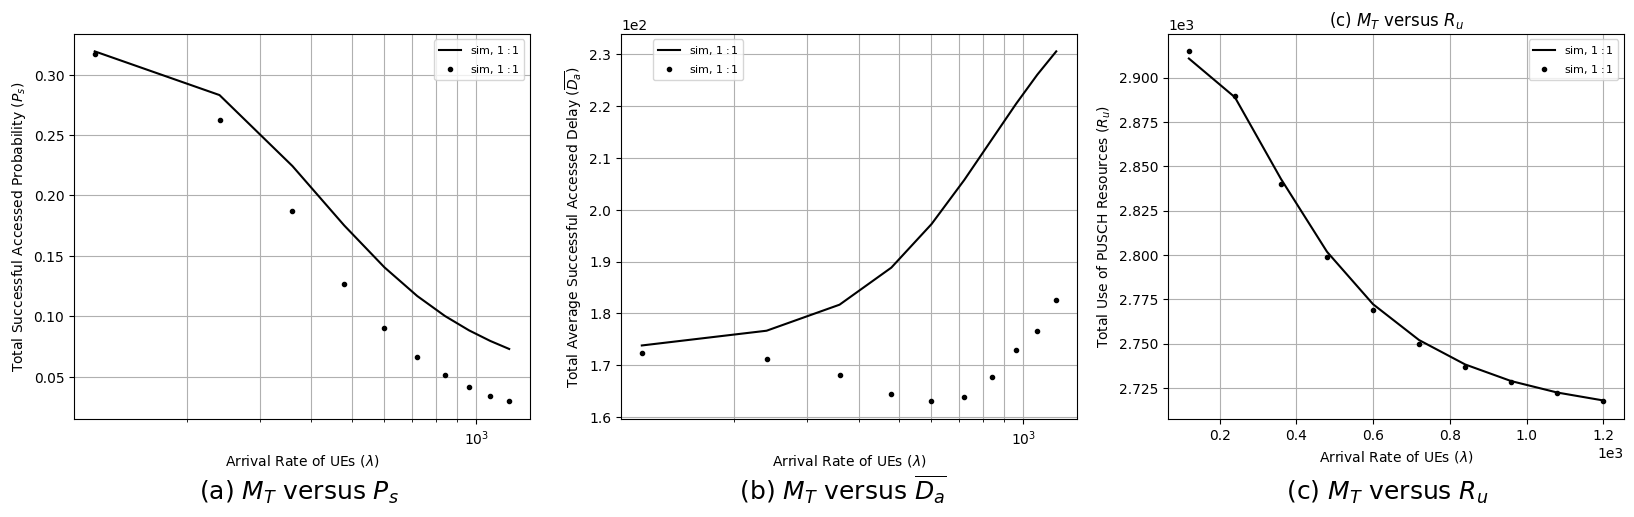

In [266]:
plt.subplot(131)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Da_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
# plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

## **Plotting Figures 0**

In [24]:
sim = pandas.read_csv('sim_testresult.csv')
ana = pandas.read_csv('ana_testresult.csv')
sim

,M_4SRA,N_4SRA,wrar_4SRA,wbo_4SRA,rts_4SRA,Ms_4SRA,Ps_4SRA,Da_4SRA,Ur_PRACH_4SRA,Ur_PUSCH_4SRA,...,Ps_FB,Da_FB,Ur_PRACH_FB,Ur_PUSCH_FB,Ms_T,Ps_T,Da_2SRA_T,Da_T,Ur_PUSCH_4SRA_T,Ur_PUSCH_T
0,60,27,5,20,5,58.0,0.966667,97.810345,0.000009,58.0,...,0.000000,0.000000,0.000000,0.0,116.0,0.966667,138.448276,118.129310,58.0,6480058.0
1,120,27,5,20,5,115.0,0.958333,110.586957,0.000018,115.0,...,0.000000,0.000000,0.000000,0.0,230.0,0.958333,169.000000,139.793478,115.0,6480115.0
2,180,27,5,20,5,170.0,0.944444,125.235294,0.000026,170.0,...,0.500000,93.500000,0.000000,2.0,340.0,0.944444,200.982353,163.108824,172.0,6480172.0
3,240,27,5,20,5,166.0,0.691667,141.240964,0.000026,166.0,...,0.717949,124.214286,0.000004,28.0,385.0,0.802083,206.223744,178.205195,194.0,6480194.0
4,300,27,5,20,5,159.0,0.530000,149.066038,0.000025,159.0,...,0.726027,153.264151,0.000016,106.0,406.0,0.676667,206.238866,183.848522,265.0,6480265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5760,27,5,20,5,0.0,0.000000,0.000000,0.000000,0.0,...,0.006929,263.763158,0.000006,38.0,58.0,0.005035,297.120690,297.120690,38.0,6480038.0
96,5820,27,5,20,5,5.0,0.000859,318.500000,0.000001,5.0,...,0.006315,266.785714,0.000005,35.0,60.0,0.005155,300.681818,302.166667,40.0,6480040.0
97,5880,27,5,20,5,6.0,0.001020,323.500000,0.000001,6.0,...,0.004467,264.500000,0.000004,25.0,53.0,0.004507,308.563830,310.254717,31.0,6480031.0
98,5940,27,5,20,5,0.0,0.000000,0.000000,0.000000,0.0,...,0.005832,259.560606,0.000005,33.0,52.0,0.004377,296.932692,296.932692,33.0,6480033.0


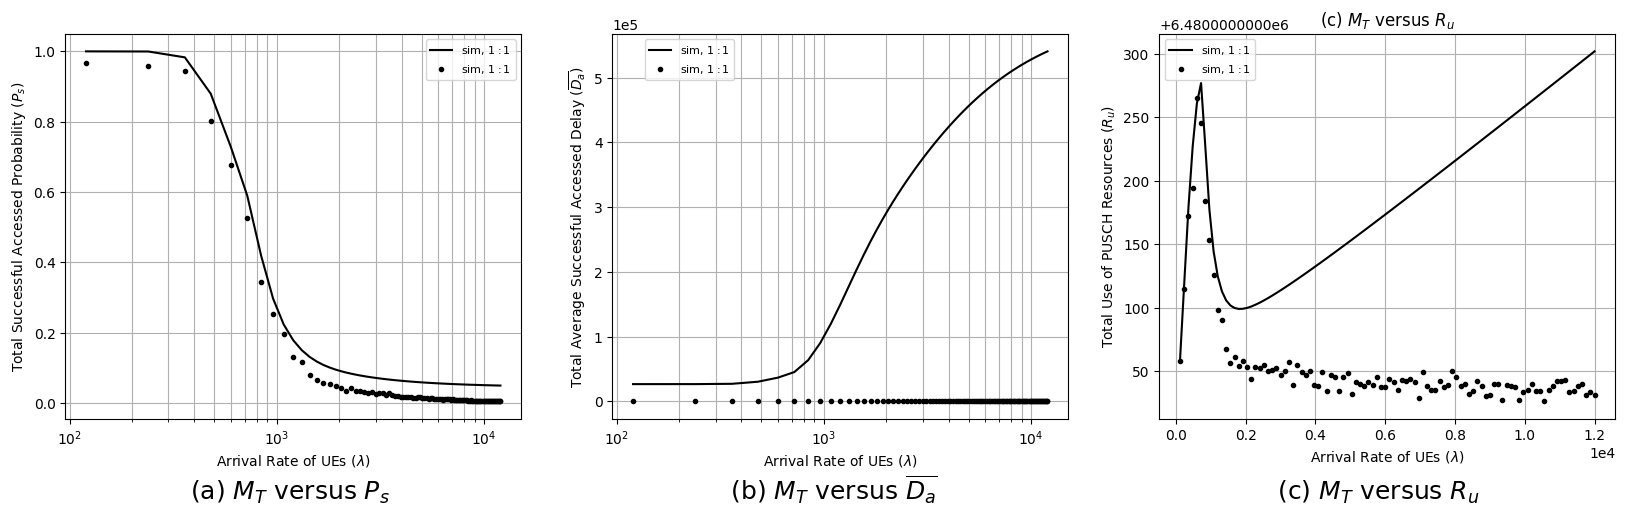

In [128]:
plt.subplot(131)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Da_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
# plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()